# **Context - Pima Indian Diabetes Database**

Dataset is originally from National Institute of Diabetes and Digestive and Kidney Diseases. THe object of the dataset is to diagnostically predict whether or not a patient has diabetes based on certain diagonostic measurements. All patients are females at least 21 years old of Pima Indian heritage.

We will build models that will predict whether or not the patients in the dataset have diabetes or not using both KNN and OLS modeling. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
%matplotlib inline

In [ ]:
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/elliebenn/datasets/master/diabetes.csv')
diabetes_df.info()
diabetes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Upon reviewing the statistics below, I noted that our data had minimum values of 0 for variables that it does not make sense for it to be 0. These variables are: glucose, blood pressure, skin thickness, insulin, and BMI. We will make these 0 values in to nulls and fill with median values. 

In [ ]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


We will replace the missing values based off their distributions below.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe31b329dd8>,
      dtype=object)

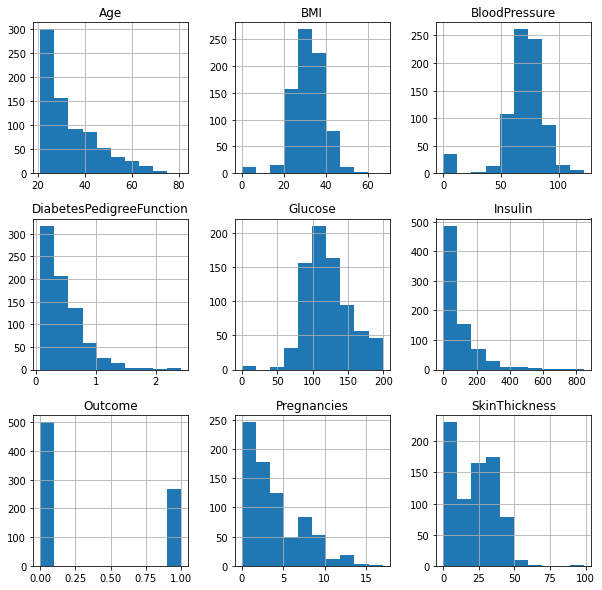

In [ ]:
diabetes_df.hist(figsize = (10,10))

In [ ]:
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# showing the count of missing values
print(diabetes_df.isnull().sum())
diabetes_df.info()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null  

Distribution graphs below show that Glucose and BloodPressure columns are mostly normally distributed where as SkinThickness, Insulin and BMI are positively skewed. We will fill Glucose and BloodPressure with mean and SkinThicknes, Insulin, and BMI with median.

In [ ]:
diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean(), inplace = True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace = True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median(), inplace = True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median(), inplace = True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].median(), inplace = True)

In [ ]:
# Double checking the count of missing values after filling everything in
print(diabetes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Below is the distribution of our target variable, Blood Pressure. It appears normally distributed.

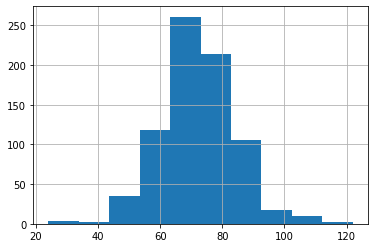

In [ ]:
diabetes_df['BloodPressure'].hist()

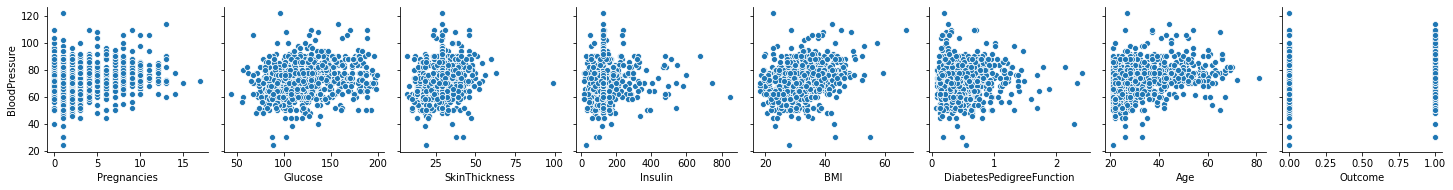

In [ ]:
#Visualizing with seaborn 
sns.pairplot(data=diabetes_df, y_vars = ['BloodPressure'], x_vars = ['Pregnancies','Glucose',
                                                      'SkinThickness','Insulin',
                                                      'BMI','DiabetesPedigreeFunction','Age', 'Outcome'])
plt.show()

From below heatmap, we see that we do not have any features that are highly correlated with our target variable, BloodPressure. We do have some variables that have high correlations with each other such as clucose and whether or not a patient has diabetes and age with pregnancies.

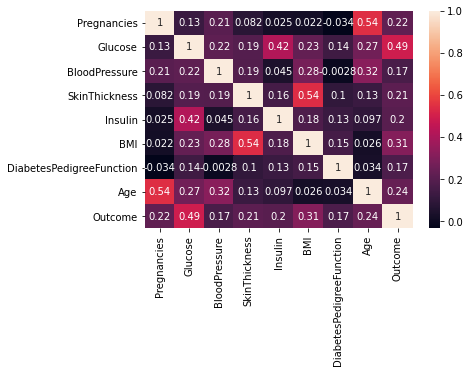

In [ ]:
sns.heatmap(diabetes_df.corr(),annot=True)

In [ ]:
Y = diabetes_df[['BloodPressure']]
X = diabetes_df[['Pregnancies','Glucose', 'SkinThickness', 'Insulin', 'BMI', 
                 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))
print()

The number of observations in training set is 614
The number of observations in test set is 154



**Linear Regression**

In [ ]:
# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("Accuracy of the Linear OLS model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("---------------Test set statistics---------------")
print("Accuracy of the Linear model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) *100))

Accuracy of the Linear OLS model in the training set is: 0.18392005599933545
---------------Test set statistics---------------
Accuracy of the Linear model in the test set is: 0.22979581697837936
Mean absolute error of the prediction is: 8.025198969007906
Mean squared error of the prediction is: [112.09282173]
Root mean squared error of the prediction is: [10.58738975]
Mean absolute percentage error of the prediction is: BloodPressure    11.096069
dtype: float64


**KNN Regression**

In [ ]:
# We fit an OLS model using sklearn
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

# We are making predictions here
y_preds_train = knn.predict(X_train)
y_preds_test = knn.predict(X_test)

print("Accuracy of the KNN model in the training set is: {}".format(knn.score(X_train, y_train)))
print("---------------Test set statistics---------------")
print("Accuracy of the KNN model in the test set is: {}".format(knn.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Accuracy of the KNN model in the training set is: 0.22508700284133287
---------------Test set statistics---------------
Accuracy of the KNN model in the test set is: 0.20783447432109992
Mean absolute error of the prediction is: 8.182226572881417
Mean squared error of the prediction is: [115.28899869]
Root mean squared error of the prediction is: [10.73727147]
Mean absolute percentage error of the prediction is: BloodPressure    11.385816
dtype: float64


In [ ]:
score_knn = cross_val_score(knn, X, Y, cv=5)
score_lrm = cross_val_score(lrm, X, Y, cv=5)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))
score_w = cross_val_score(lrm, X, Y, cv=5)
print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score_lrm.mean(), score_lrm.std() * 2))

KNN Accuracy: 0.09 (+/- 0.11)
OLS Accuracy: 0.17 (+/- 0.06)


**Compare the two models, KNN and OLS. How similar are they? Do they miss in different ways?**

In our Linear regression model, accuracy in our training data was 18% and increased to  22.9% in testing. For our KNN model, training accuracy was at 22.5% and it decreased in testing to 20.7. While both values for our models are not great, they are values within close proximity to each other. Overall accuracy for KNN is 9% and 17% for OLS. While still low, based off the overall accuracy, OLS outperforms KNN in our model by almost double!. I would say in this model there is not very many differences as far as statistics go. 

Our KNN model decreases in accuracy from training to test so it is overfitting. 

**Describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model.**
> Since regression is typically used to identify the strength of the effect that the independent variables have on a dependent variable, our dataset may not have been the best choice to showcase knn/ols regression very capable abilities. In particular, our BloodPressure distributions, as depicted in below scatterplots, appears to not have a linear relationship with any variables. The features it appears to have a the highest yet still mild linear relationship is Age and BMI. 

> While our data did a good job of providing an insight into a small sector of patients, I'd be curious to look at the entire data available. Per the kaggle link, it stated that only females over the age of 21 were included in the dataset I utilized. I'd be interested in adding male data into the mix and seeing if that would provide some new insights.  

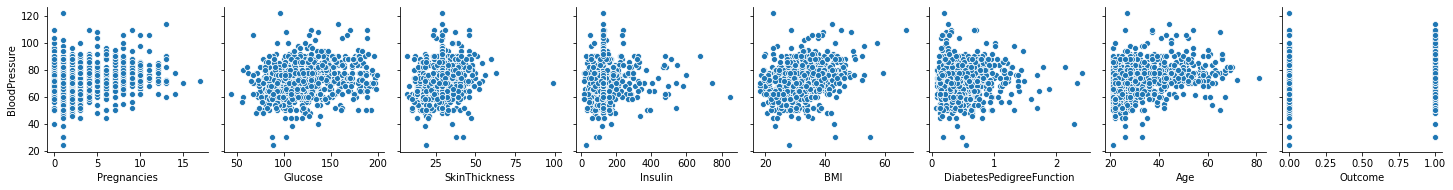

In [ ]:
#Visualizing with seaborn 
sns.pairplot(data=diabetes_df, y_vars = ['BloodPressure'], x_vars = 
             ['Pregnancies','Glucose', 'SkinThickness','Insulin', 'BMI',
              'DiabetesPedigreeFunction','Age', 'Outcome'])
plt.show()